In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path_qasa = "/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/computing scores/FULL ALIGNED/qasa_aligned_iris_100.csv"
qasa = pd.read_csv(path_qasa)

In [4]:
path_qasper = "/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/computing scores/FULL ALIGNED/qasper_aligned_iris_100.csv"
qasper = pd.read_csv(path_qasper)

In [5]:
qasa.columns

Index(['Unnamed: 0', 'question', 'context', 'correct_answer', 'iris_answer',
       'Rouge1', 'Rouge2', 'RougeL', 'Bleu', 'Chrf', 'ChrfPlus', 'Meteor',
       'Ter', 'Bert', 'WMS', 'SMS', 'Wisdm', 'Bleurt', 'BEM', 'Bart',
       'Prometheus', 'Faithfullness', 'Relevancy', 'Correctness', 'RSim',
       'Consistency', 'TSim', 'LLM'],
      dtype='object')

In [6]:
qasa["Prometheus"] = qasa["Prometheus"].astype("float64")

In [7]:
qasa.dtypes

Unnamed: 0          int64
question           object
context            object
correct_answer     object
iris_answer        object
Rouge1            float64
Rouge2            float64
RougeL            float64
Bleu              float64
Chrf              float64
ChrfPlus          float64
Meteor            float64
Ter               float64
Bert              float64
WMS               float64
SMS               float64
Wisdm             float64
Bleurt            float64
BEM               float64
Bart              float64
Prometheus        float64
Faithfullness     float64
Relevancy         float64
Correctness       float64
RSim              float64
Consistency       float64
TSim              float64
LLM               float64
dtype: object

In [8]:
qasper.columns

Index(['Unnamed: 0', 'question', 'context', 'correct_answer', 'iris_answer',
       'Rouge1', 'Rouge2', 'RougeL', 'Bleu', 'Chrf', 'ChrfPlus', 'Meteor',
       'Ter', 'Bert', 'WMS', 'SMS', 'Wisdm', 'Bleurt', 'BEM', 'Bart',
       'Prometheus', 'Faithfullness', 'Relevancy', 'Correctness', 'RSim',
       'Consistency', 'TSim', 'LLM'],
      dtype='object')

In [9]:
qasper["Prometheus"] = qasper["Prometheus"].astype("float64")

In [10]:
qasper['Wisdm'] = pd.to_numeric(qasper['Wisdm'], errors='coerce')

In [11]:
qasper.dtypes

Unnamed: 0          int64
question           object
context            object
correct_answer     object
iris_answer        object
Rouge1            float64
Rouge2            float64
RougeL            float64
Bleu              float64
Chrf              float64
ChrfPlus          float64
Meteor            float64
Ter               float64
Bert              float64
WMS               float64
SMS               float64
Wisdm             float64
Bleurt            float64
BEM               float64
Bart              float64
Prometheus        float64
Faithfullness     float64
Relevancy         float64
Correctness       float64
RSim              float64
Consistency       float64
TSim              float64
LLM               float64
dtype: object

In [12]:
df = pd.concat([qasper, qasa], ignore_index=True)

In [13]:
columns_of_interest = ['Rouge1',
       'Rouge2', 'RougeL', 'Bleu', 'Chrf', 'ChrfPlus', 'Meteor', 'Ter', 'Bert',
       'WMS', 'SMS', 'Wisdm', 'Bleurt', 'BEM', 'Bart', 'Prometheus',
       'Faithfullness', 'Relevancy', 'Correctness', 'RSim', 'Consistency',
       'TSim', 'LLM']
selected_columns_df = df[columns_of_interest]
spearman_correlation_matrix = selected_columns_df.corr(method='spearman')

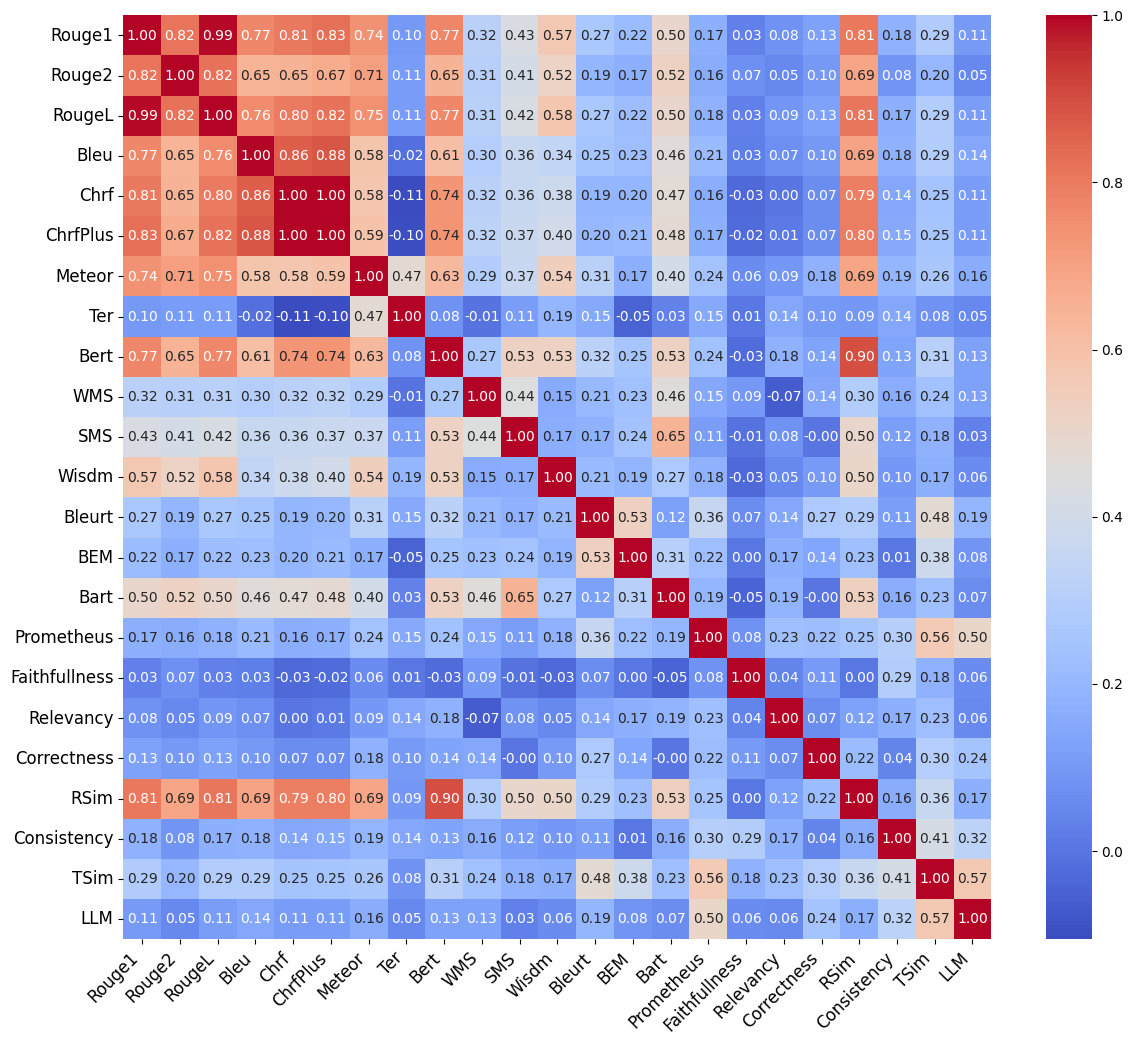

In [14]:
plt.figure(figsize=(14, 12))  # Increase the figure size

sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 10},  # Adjust the font size of the annotations
            xticklabels=spearman_correlation_matrix.columns,
            yticklabels=spearman_correlation_matrix.columns)

plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)  # Set y-axis labels font size

plt.show()

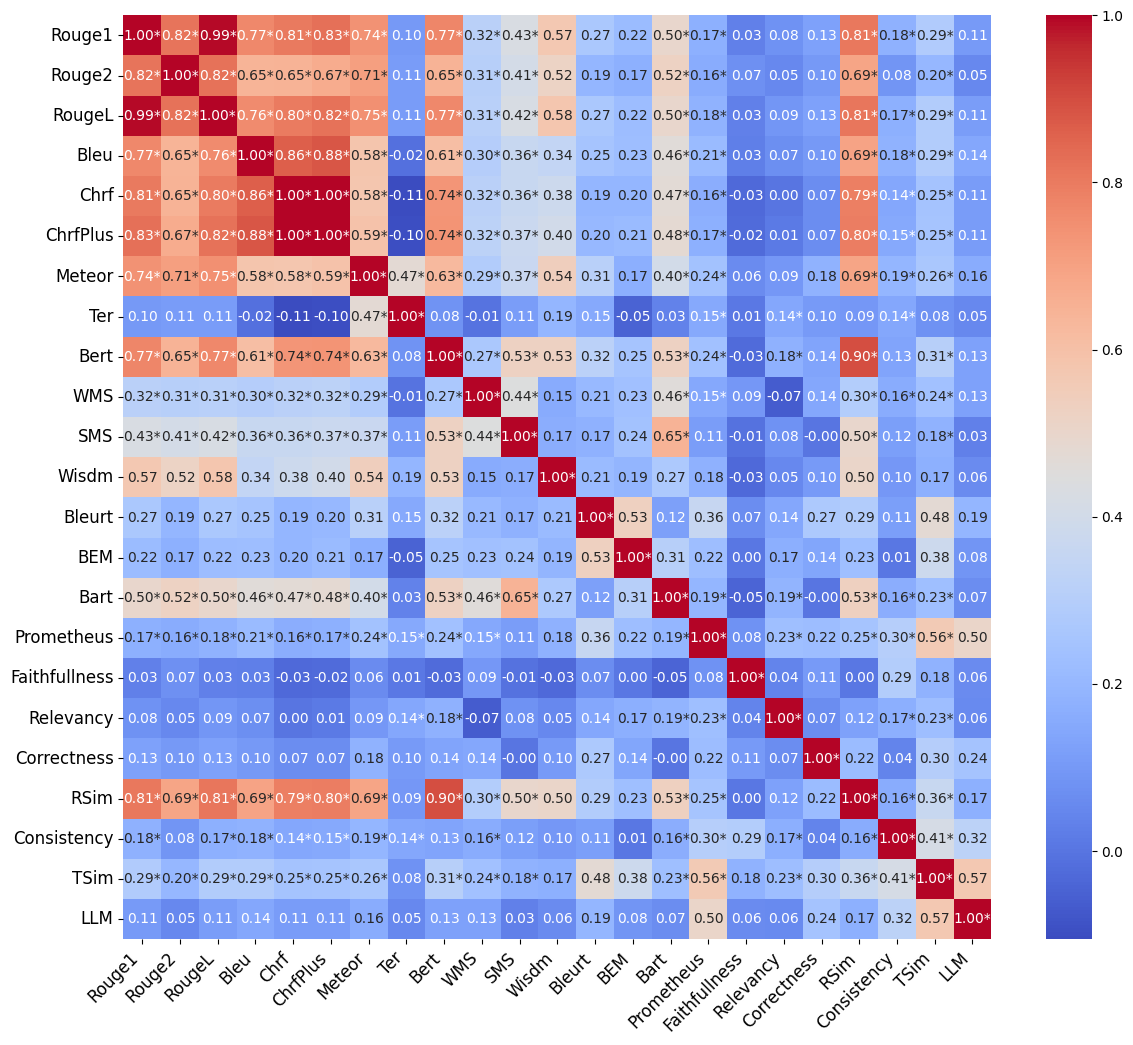

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import pandas as pd

# Assuming you have your data in a dataframe called 'df'
# Replace 'df' with your actual data

# Calculate Spearman correlation matrix and p-values
columns_of_interest = ['Rouge1', 'Rouge2', 'RougeL', 'Bleu', 'Chrf', 'ChrfPlus', 'Meteor', 
                       'Ter', 'Bert', 'WMS', 'SMS', 'Wisdm', 'Bleurt', 'BEM', 'Bart', 
                       'Prometheus', 'Faithfullness', 'Relevancy', 'Correctness', 
                       'RSim', 'Consistency', 'TSim', 'LLM']
selected_columns_df = df[columns_of_interest]
spearman_correlation_matrix = selected_columns_df.corr(method='spearman')

# Initialize a p-values dataframe filled with ones
p_values = pd.DataFrame(np.ones_like(spearman_correlation_matrix), 
                        columns=spearman_correlation_matrix.columns, 
                        index=spearman_correlation_matrix.index)

# Calculate correlation and p-values
for row in spearman_correlation_matrix.columns:
    for col in spearman_correlation_matrix.index:
        if row == col:  # Diagonal elements
            spearman_correlation_matrix.loc[row, col] = 1
            p_values.loc[row, col] = 0  # Set p-value to 0 or some very small value
        else:
            corr, p_val = spearmanr(df[row], df[col])
            if not np.isnan(corr):  # Avoid NaN values in correlation
                spearman_correlation_matrix.loc[row, col] = corr
            if not np.isnan(p_val):  # Avoid NaN values in p-values
                p_values.loc[row, col] = p_val

# Function to annotate the heatmap based on p-values (add '*' for p-values <= 0.05)
def annotate_heatmap(data, p_values):
    annot = data.copy().astype(str)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if np.isnan(data.iloc[i, j]):  # Handle NaN values
                annot.iloc[i, j] = ""
            elif p_values.iloc[i, j] <= 0.05:
                annot.iloc[i, j] = f"{data.iloc[i, j]:.2f}*"
            else:
                annot.iloc[i, j] = f"{data.iloc[i, j]:.2f}"
    return annot

# Generate the annotated heatmap
annotated_corr_matrix = annotate_heatmap(spearman_correlation_matrix, p_values)

# Plot the heatmap
plt.figure(figsize=(14, 12))  # Adjust figure size
sns.heatmap(spearman_correlation_matrix, annot=annotated_corr_matrix, cmap='coolwarm', fmt="", 
            annot_kws={"size": 10},
            xticklabels=spearman_correlation_matrix.columns, 
            yticklabels=spearman_correlation_matrix.columns)

plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)  # Set y-axis labels font size
plt.show()



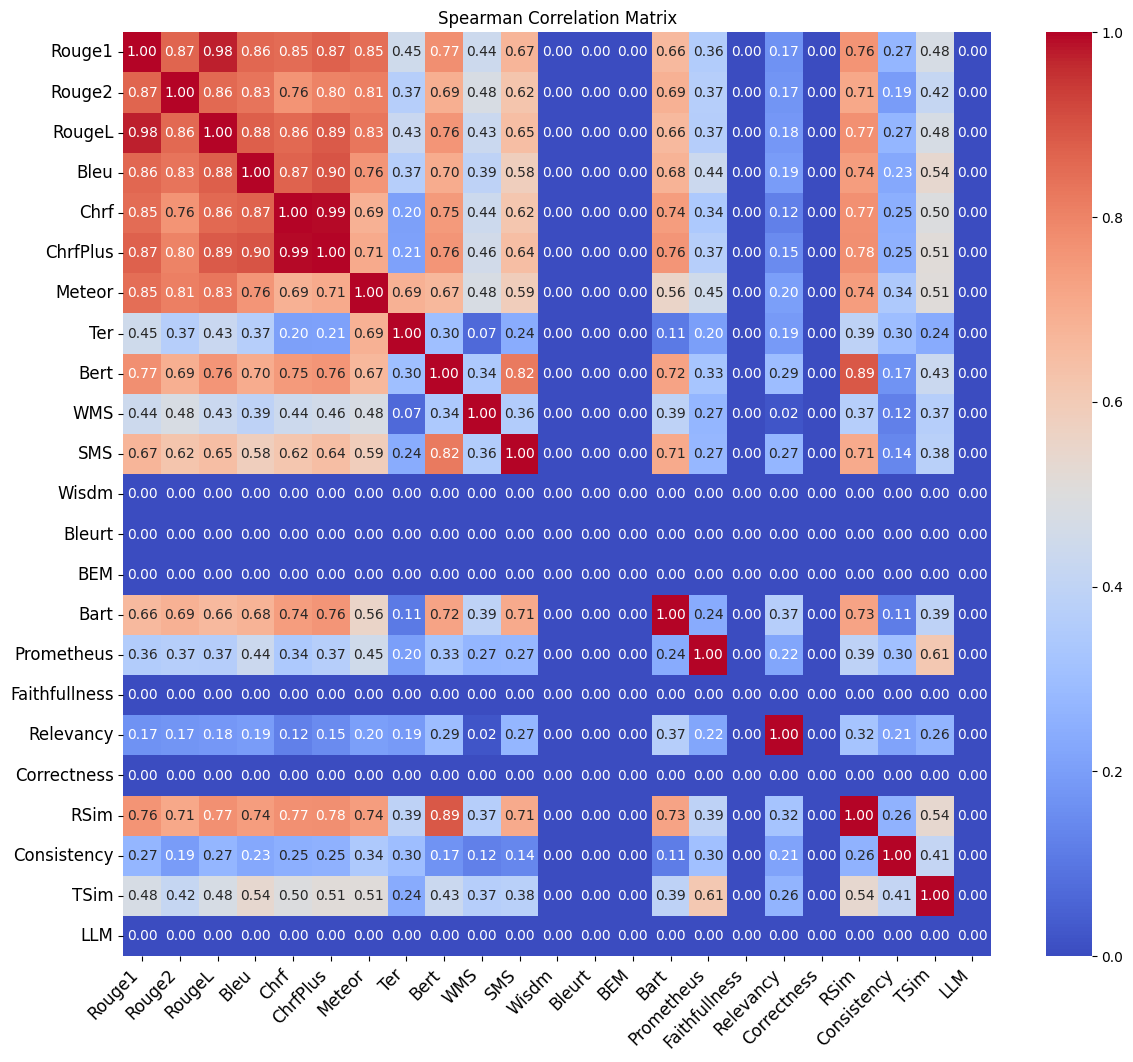

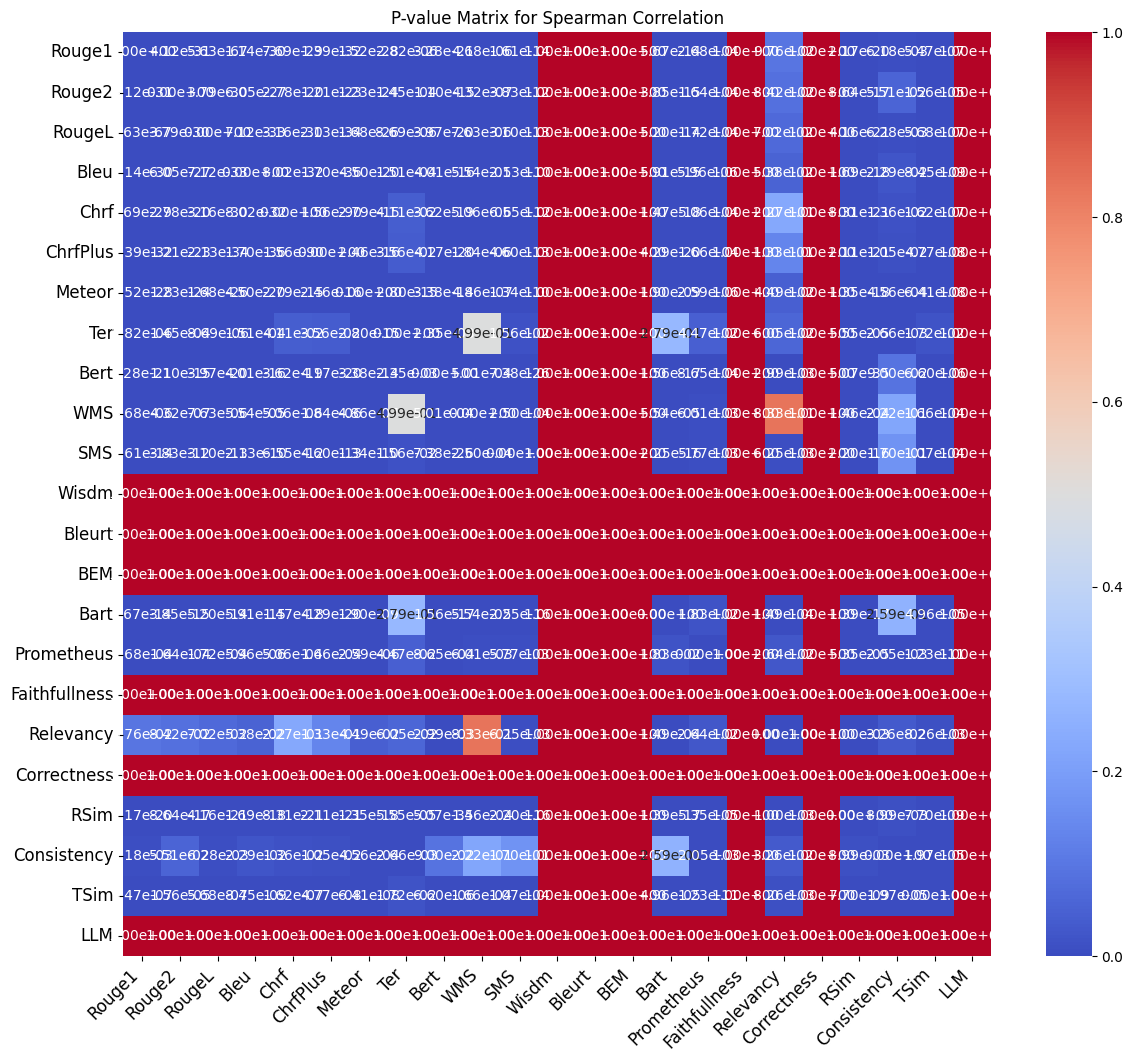

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import numpy as np

# Load your data
path = "/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/computing scores/FULL ALIGNED/qasa_aligned_iris_100.csv"
df = pd.read_csv(path)

# Select the columns of interest
columns_of_interest = ['Rouge1', 'Rouge2', 'RougeL', 'Bleu', 'Chrf', 'ChrfPlus', 
                       'Meteor', 'Ter', 'Bert', 'WMS', 'SMS', 'Wisdm', 'Bleurt', 
                       'BEM', 'Bart', 'Prometheus', 'Faithfullness', 'Relevancy', 
                       'Correctness', 'RSim', 'Consistency', 'TSim', 'LLM']
selected_columns_df = df[columns_of_interest]

# Initialize matrices for Spearman correlations and p-values
spearman_correlation_matrix = np.zeros((len(columns_of_interest), len(columns_of_interest)))
p_value_matrix = np.zeros((len(columns_of_interest), len(columns_of_interest)))

# Compute Spearman correlation and p-values
for i, col1 in enumerate(columns_of_interest):
    for j, col2 in enumerate(columns_of_interest):
        corr, p_value = spearmanr(selected_columns_df[col1], selected_columns_df[col2])
        # Handle NaN values by replacing them with 0
        spearman_correlation_matrix[i, j] = corr if not np.isnan(corr) else 0
        p_value_matrix[i, j] = p_value if not np.isnan(p_value) else 1

# Convert matrices to DataFrame for easier handling
spearman_correlation_df = pd.DataFrame(spearman_correlation_matrix, columns=columns_of_interest, index=columns_of_interest)
p_value_df = pd.DataFrame(p_value_matrix, columns=columns_of_interest, index=columns_of_interest)

# Plot the heatmap for Spearman correlation
plt.figure(figsize=(14, 12))
sns.heatmap(spearman_correlation_df, annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 10},
            xticklabels=spearman_correlation_df.columns,
            yticklabels=spearman_correlation_df.columns)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Spearman Correlation Matrix')
plt.show()

# Plot the heatmap for p-values
plt.figure(figsize=(14, 12))
sns.heatmap(p_value_df, annot=True, cmap='coolwarm', fmt=".2e",
            annot_kws={"size": 10},
            xticklabels=p_value_df.columns,
            yticklabels=p_value_df.columns)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('P-value Matrix for Spearman Correlation')
plt.show()
